In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.feature_selection import SelectFromModel

#Lab 8 drive folder - https://drive.google.com/drive/folders/13JbpJonCJj8GmlWWWGHMbbjQjquhvV2Y
#Lab 9 drive folder - https://drive.google.com/drive/folders/1dj8fnMxXJdO75LquYtNpjJhcyhINvH-7

#url diamonds - https://raw.githubusercontent.com/Grozental11/BGU_IntroToDS/main/datasets/diamonds.csv
#url players - https://raw.githubusercontent.com/Grozental11/BGU_IntroToDS/main/datasets/male_players.csv

seed = 326705647 + 211936059

le = LabelEncoder()

url = 'https://raw.githubusercontent.com/Grozental11/BGU_IntroToDS/main/datasets/diamonds.csv'
data = pd.read_csv(url)

# Part 1 - Diamonds and KNN

In [ ]:
#Q1
data['clarity_encoded'] = le.fit_transform(data['clarity'])
X = data[['price', 'depth', 'carat', 'y', 'x', 'table']]
y = data['clarity_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

accuracy, f1

(0.33938944506241503, 0.3308682484639423)

In [ ]:
#Q2
data['cut_encoded'] = le.fit_transform(data['cut'])
data['color_encoded'] = le.fit_transform(data['color'])

X_updated = data[['price', 'depth', 'carat', 'y', 'x', 'table', 'cut_encoded', 'color_encoded']]
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y, test_size=0.3, random_state=42)

knn_updated = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_updated.fit(X_train_updated, y_train_updated)

y_pred_updated = knn_updated.predict(X_test_updated)

accuracy_updated = accuracy_score(y_test_updated, y_pred_updated)
f1_updated = f1_score(y_test_updated, y_pred_updated, average='weighted')

accuracy_updated, f1_updated

(0.4555679149672476, 0.4498281455060786)

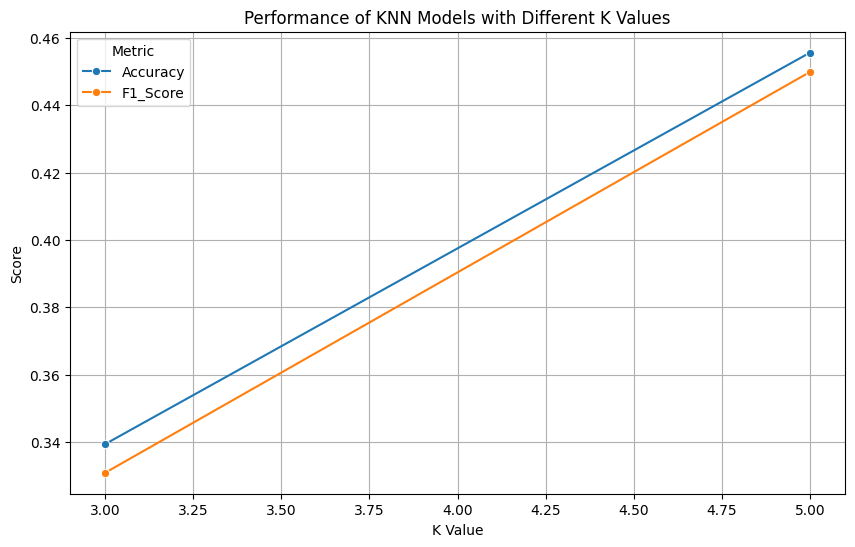

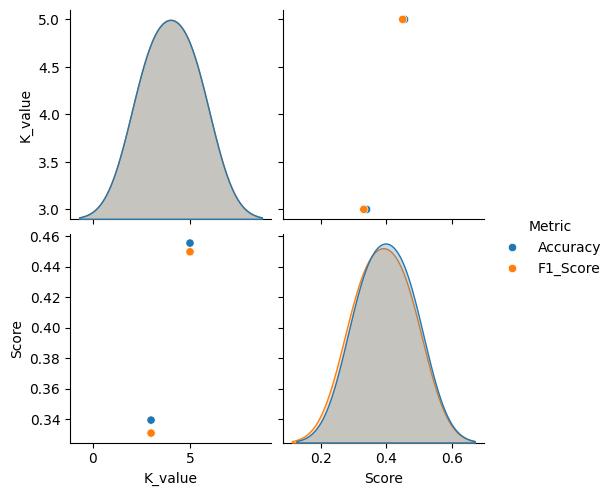

In [ ]:
#Q3
performance_data = pd.DataFrame({
    'K_value': [3, 5],
    'Accuracy': [accuracy, accuracy_updated],
    'F1_Score': [f1, f1_updated]
})

performance_data_melted = pd.melt(performance_data, id_vars=['K_value'], value_vars=['Accuracy', 'F1_Score'],
                                  var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.lineplot(data=performance_data_melted, x='K_value', y='Score', hue='Metric', marker='o')
plt.title('Performance of KNN Models with Different K Values')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.grid(True)
plt.legend(title='Metric')
plt.show()

sns.pairplot(performance_data_melted, hue='Metric')
plt.show()

# Part 2 - Decision Trees

In [ ]:
url = 'https://raw.githubusercontent.com/Grozental11/BGU_IntroToDS/main/datasets/male_players.csv'
data = pd.read_csv(url)

In [ ]:
#Q1
data['PosCat'] = ''
newPos = {
    1 : ["ST", "LW", "RW", "CF", "LF", "RF", "RW"], #ATT
    2 : ["CAM", "LM", "CM", "RM"], # MID
    3 : ["CDM", "RB", "CB", "LB", "RWB", "LWB"], #DEF
    4 : "GK" #GK
}

for index, row in data.iterrows():
  for key, value in newPos.items():
    if row["Position"] in value:
      data["PosCat"][index] = key
      break

<ipython-input-58-23f3675bdc37>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["PosCat"][index] = key


In [ ]:
#Q2
X = data[['Acceleration', 'Position','Aggression', 'Agility', 'Balance', 'Ball', 'Composure', 'Crossing', 'Curve', 'Def', 'Defending', 'Dribbling', 'Finishing', 'Free', 'Heading', 'Interceptions', 'Jumping', 'Long', 'Pace', 'Passing', 'Penalties', 'Physicality', 'Positioning', 'Reactions', 'Shot', 'Shooting', 'Sliding', 'Sprint', 'Stamina', 'Standing', 'Strength', 'Vision', 'Volleys']]
y = data['PosCat']

#train, test = train_test_split(data, test_size=0.2, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [ ]:
#Q3
X_train1 = X_train.drop(columns=['Position'])
X_test1 = X_test.drop(columns=['Position'])

dt3 = DecisionTreeClassifier(max_depth=3)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
dt3.fit(X_train1, y_train)
y_pred = dt3.predict(X_test1)

acc_score3 = accuracy_score(y_test, y_pred)
f1_acc3 = f1_score(y_test, y_pred, average="micro")
recall_score3 = recall_score(y_test, y_pred, average="micro")
precision_score3 = precision_score(y_test, y_pred, average="micro")
print("K3")
print("acc_score       ", acc_score3)
print("f1_acc          ", f1_acc3)
print("recall_score    ", recall_score3)
print("precision_score ", precision_score3)

K3
acc_score        0.8002524455664247
f1_acc           0.8002524455664247
recall_score     0.8002524455664247
precision_score  0.8002524455664247


In [ ]:
dt7 = DecisionTreeClassifier(max_depth=7)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
dt7.fit(X_train1, y_train)
y_pred = dt7.predict(X_test1)

acc_score7 = accuracy_score(y_test, y_pred)
f1_acc7 = f1_score(y_test, y_pred, average="micro")
recall_score7 = recall_score(y_test, y_pred, average="micro")
precision_score7 = precision_score(y_test, y_pred, average="micro")
print("K7")
print("acc_score       ", acc_score7)
print("f1_acc          ", f1_acc7)
print("recall_score    ", recall_score7)
print("precision_score ", precision_score7)

K7
acc_score        0.8371726096560429
f1_acc           0.8371726096560429
recall_score     0.8371726096560429
precision_score  0.8371726096560429


In [ ]:
#Q4

dt5 = DecisionTreeClassifier(max_depth=5)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
X_train['Position'] = le.fit_transform(X_train['Position'])
X_test['Position'] = le.fit_transform(X_test['Position'])
dt5.fit(X_train, y_train)
y_pred = dt5.predict(X_test)

acc_score5 = accuracy_score(y_test, y_pred)
f1_acc5 = f1_score(y_test, y_pred, average="micro")
recall_score5 = recall_score(y_test, y_pred, average="micro")
precision_score5 = precision_score(y_test, y_pred, average="micro")
print("K5")
print("acc_score       ", acc_score5)
print("f1_acc          ", f1_acc5)
print("recall_score    ", recall_score5)
print("precision_score ", precision_score5)

K5
acc_score        0.932786367939413
f1_acc           0.932786367939413
recall_score     0.932786367939413
precision_score  0.932786367939413


In [ ]:
#Q5

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (32,10), dpi=600)
tree.plot_tree(dt5,
               feature_names = data.columns,
               filled = True
               ,fontsize=5);

In [44]:
#Q6 Part A
feature_importances = dt3.feature_importances_
features_series = pd.Series(feature_importances, index=X_train1.columns).sort_values(ascending=False)
top_10_features = features_series.head(10).index.tolist()
print("Top 10 Features:", top_10_features)
X_train_top10 = X_train1[top_10_features]
X_test_top10 = X_test1[top_10_features]
dt_top10 = DecisionTreeClassifier(max_depth=3)
dt_top10.fit(X_train_top10, y_train)
y_pred_top10 = dt_top10.predict(X_test_top10)

accuracy_top10 = accuracy_score(y_test, y_pred_top10)
print("Accuracy with Top 10 Features:", accuracy_top10) # those 10 features are the main qualities of good football players

Top 10 Features: ['Sliding', 'Positioning', 'Finishing', 'Heading', 'Vision', 'Passing', 'Reactions', 'Penalties', 'Physicality', 'Acceleration']
Accuracy with Top 10 Features: 0.8002524455664247


In [45]:
#Q6 Part B
threshold = 0.01 #We choose to ensure that only features with at least 1% contribution to the model decisions are included,for focusing on more influential factors while maintaining model simplicity.
selected_features = features_series[features_series >= threshold].index.tolist()
print("Selected Features:", selected_features)

X_train_selected = X_train1[selected_features]
X_test_selected = X_test1[selected_features]

dt_selected = DecisionTreeClassifier(max_depth=3)
dt_selected.fit(X_train_selected, y_train)
y_pred_selected = dt_selected.predict(X_test_selected)

accuracy_selected = accuracy_score(y_test, y_pred_selected)
print("Accuracy with Selected Features:", accuracy_selected)

Selected Features: ['Sliding', 'Positioning', 'Finishing', 'Heading', 'Vision']
Accuracy with Selected Features: 0.8002524455664247


In [51]:
#Q7
np.random.seed(seed)

data2 = data[['Acceleration', 'PosCat', 'Aggression', 'Agility', 'Balance', 'Ball', 'Composure', 'Crossing', 'Curve', 'Def', 'Defending', 'Dribbling', 'Finishing', 'Free', 'Heading', 'Interceptions', 'Jumping', 'Long', 'Pace', 'Passing', 'Penalties', 'Physicality', 'Positioning', 'Reactions', 'Shot', 'Shooting', 'Sliding', 'Sprint', 'Stamina', 'Standing', 'Strength', 'Vision', 'Volleys']]
random_rows = data2.sample(n=5, random_state=seed)
X = random_rows.drop(columns=['PosCat'])
Y = random_rows['PosCat'].astype(int)

y_pred = dt7.predict(X)

acc_score = accuracy_score(Y, y_pred)
f1_score = f1_score(Y, y_pred, average="micro")
recall_score = recall_score(Y, y_pred, average="micro")
precision_score = precision_score(Y, y_pred, average="micro")

print("Metrics for randomly sampled data:")
print("Accuracy:", acc_score)
print("F1 Score:", f1_score)
print("Recall:", recall_score)
print("Precision:", precision_score)


Metrics for randomly sampled data:
Accuracy: 0.6
F1 Score: 0.6
Recall: 0.6
Precision: 0.6
